In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
zo=pd.read_csv('Zomato data .csv')
zo

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [8]:
zo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# Question: which type of restaurant majority of custmer order from?

In [32]:
#change data type
def handlrate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

zo['rate']=zo['rate'].apply(handlrate)
print(zo.head())  

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Text(0.5, 0, 'Type of resturent')

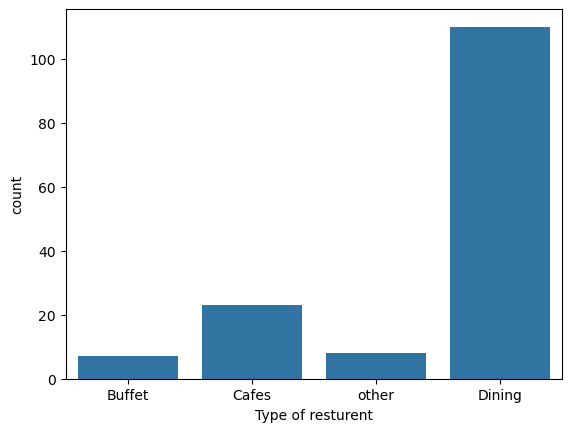

In [38]:
sns.countplot(x=zo['listed_in(type)'])
plt.xlabel("Type of restaurant")

# conculsion: Dining type restaurant get more order by custmer.

# Question:how many votes has each type of restaurant recieved from custmers ?

Text(0, 0.5, 'votes')

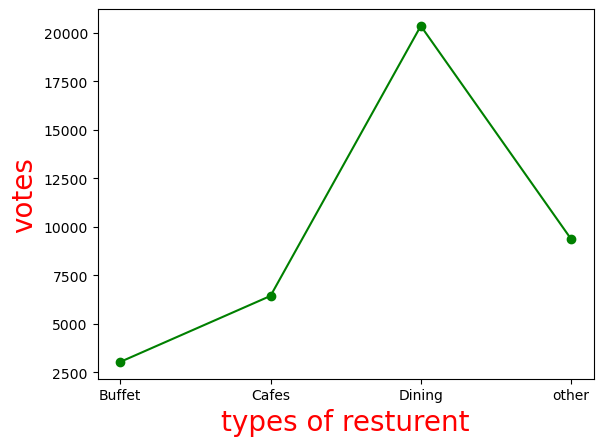

In [48]:
grouped_data=zo.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel('types of resturent',c='red',size=20)
plt.ylabel('votes',c='red',size=20)

# conculsion:Dining type restaurant get more votes.

# Question:what are the ratings that the majority of restaurants have received ?

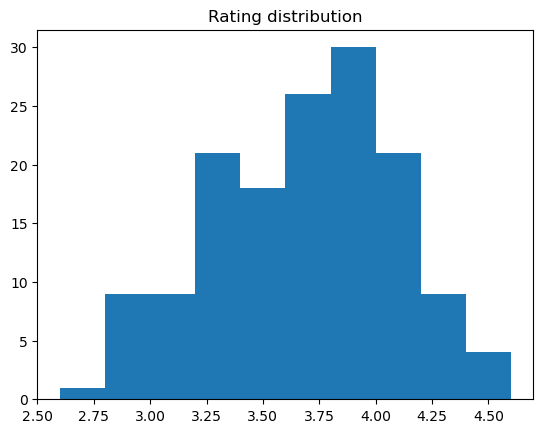

In [60]:
plt.hist(zo['rate'],bins=10)
plt.title('Rating distribution')
plt.show()

# conclusion: The restaurant are getting majority of rating 3.5 to 4.

# Question:Zomato has observed that most couples orders must of their food onlines.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

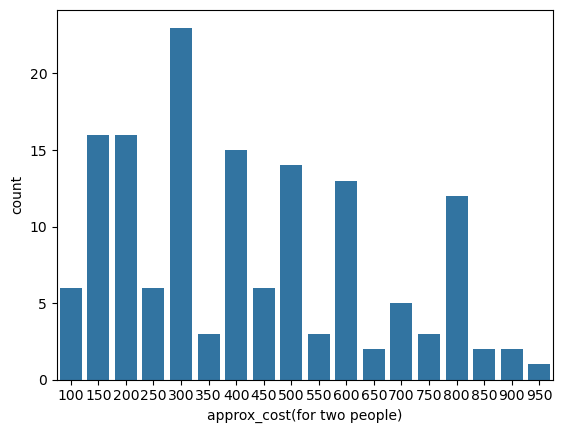

In [63]:
couple_cost=zo['approx_cost(for two people)']
sns.countplot(x=couple_cost)

In [ ]:
#conclusion:couples are most of order 300 to 500.

In [ ]:
#Question:which mode (online or offline) has recieving maximum order ?

<Axes: xlabel='online_order', ylabel='rate'>

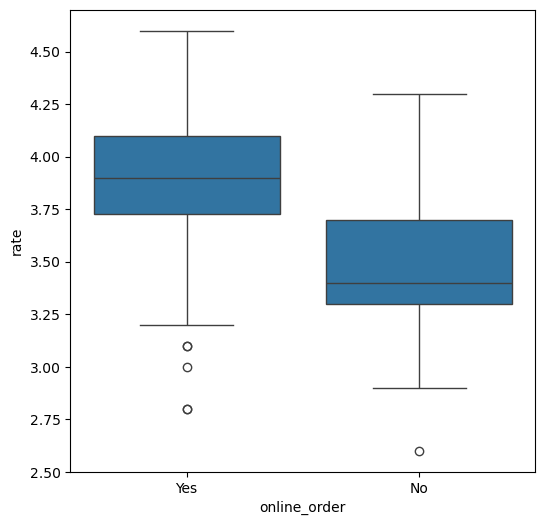

In [66]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=zo)

In [ ]:
#conclusion: Restaurant ar get more order by online mode.

In [ ]:
#Question:which type of restaurant get more offline order ,so that zomato can be provide more to custmers with some good offers?

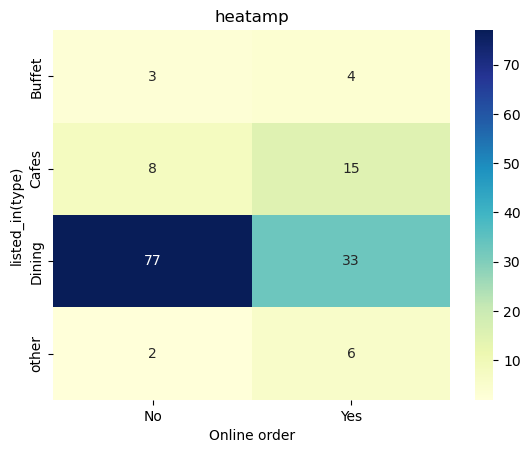

In [87]:
pivot_table=zo.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('heatamp')
plt.xlabel('Online order')
plt.plot('isted_in(type)')
plt.show()

In [ ]:
#conclusion:Dining type restarant get more offline order.